In [ ]:
!pwd
!ls

/content
sample_data


In [ ]:
!git clone https://github.com/cvjena/chimpanzee_faces

Cloning into 'chimpanzee_faces'...
remote: Enumerating objects: 7252, done.
remote: Total 7252 (delta 0), reused 0 (delta 0), pack-reused 7252
Receiving objects: 100% (7252/7252), 602.71 MiB | 32.85 MiB/s, done.
Resolving deltas: 100% (23/23), done.
Checking out files: 100% (7210/7210), done.


In [ ]:
!ls

chimpanzee_faces  sample_data


In [ ]:
cd chimpanzee_faces/

/content/chimpanzee_faces


In [ ]:
pwd

'/content/chimpanzee_faces'

In [ ]:
ls

datasets_cropped_chimpanzee_faces/  initWorkspaceChimpanzeeFacesDataset.m
demo_access_data/                   README.md


In [ ]:
cd datasets_cropped_chimpanzee_faces/

/content/chimpanzee_faces/datasets_cropped_chimpanzee_faces


In [ ]:
ls

data_CTai/  data_CZoo/


In [ ]:
cd data_CTai/

/content/chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai


In [ ]:
ls

age_group_information.mat  face_images/              identity_information.mat
age_information.mat        filelist_face_images.txt  keypoint_information.mat
annotations_ctai.txt       gender_information.mat    README_ChimpTai.md


In [ ]:
cd face_images

/content/chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai/face_images


In [ ]:
cd -

/content/chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai


In [ ]:
pwd

'/content/chimpanzee_faces/datasets_cropped_chimpanzee_faces/data_CTai'

Filename face_images/img-id767-object-1.png Name Wapi

In [ ]:
file = open('annotations_ctai.txt','r')
c=0
imagenames = []
nameofmonkey = []
for line in file:
  arr = line[:-1].split(" ")[:4]
  imagenames.append(arr[1])
  nameofmonkey.append(arr[3])

In [ ]:
len(imagenames), len(nameofmonkey)

(5078, 5078)

In [ ]:
len(set(nameofmonkey))

78

In [ ]:
dnamecount = {}
for name in nameofmonkey:
  if name not in dnamecount:
    dnamecount[name] = 1
  else:
    dnamecount[name] += 1

In [ ]:
dnamecount

{'Adult': 416,
 'Akouba': 1,
 'Akrouba': 111,
 'Akwaba': 90,
 'Alina': 22,
 'Athena': 63,
 'Atra': 143,
 'Baloo': 2,
 'Besar': 22,
 'Bienvenue': 16,
 'Caramel': 94,
 'Celine': 19,
 'Coco': 72,
 'Danane': 1,
 'Diva': 2,
 'Duna': 96,
 'Endora': 33,
 'Eva': 76,
 'Fatima': 4,
 'Freddy': 2,
 'Fredy': 342,
 'Garuda': 33,
 'Gogol': 27,
 'Haraka': 61,
 'Huxel': 43,
 'Ibrahiim': 1,
 'Ibrahim': 28,
 'Inousha': 35,
 'Isha': 118,
 'Jacobo': 65,
 'Java': 17,
 'Julia': 69,
 'Kabisha': 23,
 'Kaos': 69,
 'Kinshasa': 174,
 'Kiriku': 155,
 'Kuba': 101,
 'Liliou': 1,
 'Lilou': 76,
 'Linus': 36,
 'Louise': 169,
 'Lucas': 74,
 'Mandy': 18,
 'Marc': 3,
 'Margot': 26,
 'Max': 17,
 'Mbeli': 11,
 'Mkubwa': 57,
 'Mustapha': 46,
 'Olduvai': 3,
 'Olivia': 86,
 'Oscar': 61,
 'Ravel': 12,
 'Romario': 23,
 'Rubra': 15,
 'Sagu': 139,
 'Sassandra': 90,
 'Shogun': 171,
 'Sumatra': 231,
 'Taboo': 40,
 'Tita': 41,
 'Totem': 10,
 'Utan': 99,
 'Victor': 226,
 'Virunga': 6,
 'Voodoo': 3,
 'Wala': 124,
 'Wapi': 118,
 'Wapii'

In [ ]:
excludenames = []
for k,v in dnamecount.items():
  if v<10:
    excludenames.append(k)

In [ ]:
print(len(excludenames), excludenames)

15 ['Fatima', 'Freddy', 'Ibrahiim', 'Akouba', 'Liliou', 'Diva', 'Danane', 'Wapii', 'Baloo', 'Marc', 'Woodstiock', 'Voodoo', 'Olduvai', 'Yao', 'Virunga']


In [ ]:
id=0
name_id_dict = {}
for k,v in dnamecount.items():
  if k not in excludenames:
    name_id_dict[k] = id
    id+=1
id

63

In [ ]:
imagedirs = []
monkeyids = []
n = len(nameofmonkey)
nd={}
for i in range(n):
  if nameofmonkey[i] not in excludenames:
    imagedirs.append(imagenames[i])
    monkeyids.append(name_id_dict[nameofmonkey[i]])
    if nameofmonkey[i] not in nd:
      nd[nameofmonkey[i]]=1
    else:
      nd[nameofmonkey[i]]+=1

In [ ]:
len(imagedirs), len(monkeyids)

(5041, 5041)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(imagedirs,monkeyids, stratify=monkeyids, test_size=0.33)
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, stratify=y_train, test_size=0.33)
len(X_train), len(X_val), len(X_test)

(2262, 1115, 1664)

In [ ]:
## imagedirs and monkeyids contain the image directories, and ids for each monkey respectively
## X_val, X_test --> validation and test splits

In [ ]:
import torch
import torch.nn as nn
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
model = nn.Sequential(*list(model.children())[:-1]).cuda()
model.fc = nn.Sequential( 
                          nn.Flatten(start_dim=1),
                          nn.Linear(512, 256),
                          nn.Sigmoid(),
                          nn.Dropout(0.2),
                          nn.Linear(256, 63),
                          nn.Softmax(dim=1)).cuda()

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [ ]:
from torch.utils.data import Dataset, DataLoader
import os
import numpy as np
from numpy import asarray

class CTaiDataset(Dataset):
    def __init__(self, inputs, outputs, transform):
        self.main_dir = inputs
        self.transform = transform
        self.outputs = outputs
        
    def __len__(self):
        return len(self.outputs)

    def __getitem__(self, idx):
        image = Image.open(self.main_dir[idx]).convert("RGB")
        tensor_image = self.transform(image)
        return {'image':tensor_image,'id':self.outputs[idx]}

In [ ]:
# experiments
# ctai
# another dataset
# kl divergence loss
# open set evaluation

In [ ]:
from PIL import Image
from torchvision import transforms
trsfm = transforms.Compose([ 
                        transforms.Resize((224,224)),
                        transforms.ToTensor(),
                        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

train_set = CTaiDataset(inputs=X_train, outputs=y_train, transform=trsfm)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=32, shuffle=False, 
                               num_workers=4, drop_last=True)

val_set = CTaiDataset(X_val, outputs=y_val, transform=trsfm)
val_loader = torch.utils.data.DataLoader(val_set, batch_size=64, shuffle=False, 
                               num_workers=4, drop_last=True)

test_set = CTaiDataset(X_test, outputs=y_test, transform=trsfm)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=64, shuffle=False, 
                               num_workers=4, drop_last=True)

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:481: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


In [ ]:
# model = torch.load('model.pth')

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(50):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

# RUN UNTIL HERE!!!!!!!!!!!!!

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(50,100):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(100,150):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(150,300):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
torch.save(model,'model.pth')

In [ ]:
from google.colab import files
files.download('model.pth') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
testloss = 0
correct, total = 0,0
for idx, batch in enumerate(test_loader):
  # batch['image'] = batch['image'].cuda()
  with torch.no_grad():
    batch['image'] = batch['image'].float().cuda()
    pred_op = model(batch['image'])
    batch['id'] = batch['id'].cuda()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    testloss += celoss(pred_op, batch['id'].cuda()).item()
testloss /= len(test_loader)
print("test_loss:",testloss,"test_acc:",correct/total)

In [ ]:
epoch 200
train_loss:  3.433634042739868 train_acc: 0.6456801470588235
val_loss: 3.7779698231640984 val_acc: 0.3915441176470588
test_loss: 3.7770920991897583 test_acc: 0.3954326923076923

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(50,100):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
import torch.optim as optim
import torch.nn as nn
for param in model.parameters():
  param.requires_grad = True
opt = optim.Adam(params=model.parameters(), lr=1e-3)
celoss = nn.CrossEntropyLoss()

for epoch in range(100,150):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
for epoch in range(10,13):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
for epoch in range(13,20):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:
for epoch in range(23,100):
  print("epoch",epoch+1)
  batch_loss, c, correct, total = 0,0,0,0
  for idx, batch in enumerate(train_loader):
    batch['image'] = batch['image'].float().cuda()
    batch['id'] = batch['id'].cuda()
    pred_op = model(batch['image'])
    loss = celoss(pred_op,batch['id'])
    opt.zero_grad()
    loss.backward()
    opt.step()
    batch_loss += loss.item()
    correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
    total += batch['id'].shape[0]
    print(end='\r')
    c+=1
    print("batch"+str(c),"loss: ",loss.item(),"batch_acc:",correct/total, end='')
    # batch['id'] = batch['id'].cuda()  
  valloss = 0
  correct, total = 0,0
  for idx, batch in enumerate(val_loader):
    # batch['image'] = batch['image'].cuda()
    with torch.no_grad():
      batch['image'] = batch['image'].float().cuda()
      pred_op = model(batch['image'])
      batch['id'] = batch['id'].cuda()
      correct += (pred_op.argmax(1) == batch['id']).float().sum().item()
      total += batch['id'].shape[0]
      valloss += celoss(pred_op, batch['id'].cuda()).item()
  valloss /= len(val_loader)
  print("val_loss:",valloss,"val_acc:",correct/total)

In [ ]:


numpy_data = np.random.randn(100, 3, 24, 24)
numpy_target = np.random.randint(0, 5, size=(100))

dataset = MyDataset(numpy_data, numpy_target)
loader = DataLoader(
    dataset,
    batch_size=10,
    shuffle=True,
    num_workers=2,
    pin_memory=torch.cuda.is_available()
)

for batch_idx, (data, target) in enumerate(loader):
    print('Batch idx {}, data shape {}, target shape {}'.format(
        batch_idx, data.shape, target.shape))


In [ ]:
import seaborn as sns
sns.histplot(data=d, bins=10)

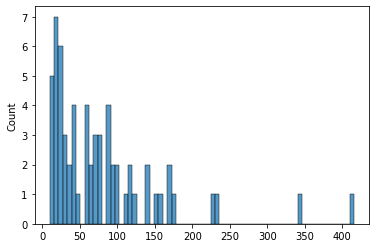

In [ ]:
import seaborn as sns
sns.histplot(data=nd, bins=70)

In [ ]:
nameofmonkey = [d[name] for name in nameofmonkey]